### Figure 1: Predicted images

In [59]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

sns.set_style("white")
sns.set_palette(sns.color_palette("Paired"))
sns.set_palette(sns.color_palette("Set2"))

In [60]:
def regrid(array):
        hr_array = np.zeros((100,100))
        for i in range(10):
                for j in range(10):
                        i1 = i*10
                        i2 = (i+1)*10
                        j1 = j*10
                        j2 = (j+1)*10
                        hr_array[i1:i2,j1:j2] = array[i,j]
        return hr_array

In [61]:
# load data
real = np.load('/user/home/al18709/work/gan_predictions_20/validation_real-opt_improve.npy')
inputs = np.load('/user/home/al18709/work/gan_predictions_20/validation_input-opt_improve.npy')
pred_cnn = np.load('/user/home/al18709/work/cnn/unet_valid_2.npy')
pred_dsrnngan = np.load('/user/home/al18709/work/gan_predictions_20/validation_pred-opt_improve.npy')[:,:,:,0]
# pred_vaegan = np.load('/user/home/al18709/work/vaegan_predictions_20/extreme_valid_pred-opt_improve_2.npy')[:,:,:,0]
pred_vaegan = np.load('/user/home/al18709/work/vaegan_predictions_20/validation_pred-opt_improve.npy')[:,:,:,0]
# pred_vaegan = np.load('/user/home/al18709/work/gan_predictions_20/validation_pred-opt_improve_9.npy')[:,:,:,0]
# pred_dsrnngan = np.load('/user/home/al18709/work/vaegan_predictions_20/extreme_valid_pred-opt_improve_5.npy')[:,:,:,0]

In [62]:
def plot_predictions(inputs,pred_cnn,pred_vaegan,pred_dsrnngan,real,storms,range_):
	if plot == 'save':
			fig, axes = plt.subplots(n, m, figsize=(5*m, 5*n), sharey=True)
	else:
			print('show')
			fig, axes = plt.subplots(n, m, figsize=(2*m, 2*n), sharey=True)

	# axes[0,0].set_title('Real',size=24)
	# axes[0,1].set_title('Predicted',size=24)
	# axes[0,2].set_title('Input',size=24)
	pal = sns.cubehelix_palette(10, rot=-.25, light=.7,as_cmap=True)

	for i in range(m):
		j = 0
		storm = storms[i]
		print('storm max: ',real[storm].max())
		print('cnn max: ',pred_cnn[storm].max())
		print('vaegan max: ',pred_vaegan[storm].max())
		print('dsrnngan max: ',pred_dsrnngan[storm].max())
		print('inputs max: ', np.nanmax(inputs[storm]))
		axes[j,i].imshow(regrid(inputs[storm]), interpolation='nearest', norm=colors.Normalize(*range_),extent=None,cmap='jet')
		axes[j+1,i].imshow(pred_cnn[storm], interpolation='nearest',norm=colors.Normalize(*range_), extent=None,cmap='jet')
		axes[j+2,i].imshow(pred_vaegan[storm], interpolation='nearest',norm=colors.Normalize(*range_), extent=None,cmap='jet')
		axes[j+3,i].imshow(pred_dsrnngan[storm], interpolation='nearest',norm=colors.Normalize(*range_), extent=None,cmap='jet')
		im = axes[j+4,i].imshow(real[storm], interpolation='nearest',norm=colors.Normalize(*range_), extent=None,cmap='jet')
		axes[j,i].set(xticklabels=[])
		axes[j,i].set(yticklabels=[])
		axes[j+1,i].set(xticklabels=[])
		axes[j+1,i].set(yticklabels=[])
		axes[j+2,i].set(xticklabels=[])
		axes[j+2,i].set(yticklabels=[])
		axes[j+3,i].set(xticklabels=[])
		axes[j+3,i].set(yticklabels=[])
		axes[j+4,i].set(xticklabels=[])
		axes[j+4,i].set(yticklabels=[])


		axes[j,0].set_ylabel('LR input',rotation=0,fontsize=48,labelpad=240)
		axes[j+1,0].set_ylabel('U-NET',rotation=0,fontsize=48,labelpad=240)
		axes[j+2,0].set_ylabel('VAEGAN',rotation=0,fontsize=48,labelpad=240)
		axes[j+3,0].set_ylabel('GAN',rotation=0,fontsize=48,labelpad=240)
		axes[j+4,0].set_ylabel('HR observations',rotation=0,fontsize=48,labelpad=240)

	fig.subplots_adjust(right=0.8)
	# cbar_ax = fig.add_axes([1, 0.15, 0.05, 0.7])
	cbar_ax = fig.add_axes([1, 0.031, 0.03, 0.936])
	cb = fig.colorbar(im, cax=cbar_ax,shrink=0.01)
	cb.ax.tick_params(labelsize=36)
	fig.tight_layout()

	if plot == 'save':
			plt.savefig('figure_1.png',bbox_inches='tight')
			plt.clf()
	else:
			plt.show()

In [63]:

plot = 'save'
n = 5
m = 6
# make colours
range_ = (0, 20)
# storms = [16249,15872,3,4,5,6,7,8]
storms = [1,2,3,4,5,6,7,8]

plot_predictions(inputs,pred_cnn,pred_vaegan,pred_dsrnngan,real,storms,range_)


storm max:  18.0625
cnn max:  20.178532
vaegan max:  21.63616180419922
dsrnngan max:  25.085460662841797
inputs max:  10.924680709838867
storm max:  24.0
cnn max:  25.584759
vaegan max:  21.465831756591797
dsrnngan max:  28.56232452392578
inputs max:  11.335227012634277
storm max:  37.5625
cnn max:  29.894676
vaegan max:  40.29277038574219
dsrnngan max:  42.54085159301758
inputs max:  25.96354103088379
storm max:  33.4375
cnn max:  21.41453
vaegan max:  20.22617530822754
dsrnngan max:  25.401323318481445
inputs max:  10.968031883239746
storm max:  48.6875
cnn max:  25.12411
vaegan max:  47.111148834228516
dsrnngan max:  42.865325927734375
inputs max:  19.738325119018555
storm max:  24.5
cnn max:  16.038965
vaegan max:  28.20696258544922
dsrnngan max:  19.41500473022461
inputs max:  13.426697731018066


/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 2160x1800 with 0 Axes>

show
storm max:  69.6875
cnn max:  17.023201
vaegan max:  57.182220458984375
dsrnngan max:  61.19044876098633
inputs max:  36.317928314208984
storm max:  74.75
cnn max:  21.345694
vaegan max:  36.75959014892578
dsrnngan max:  49.01307678222656
inputs max:  16.329853057861328
storm max:  32.0
cnn max:  31.40955
vaegan max:  45.37208938598633
dsrnngan max:  37.56401443481445
inputs max:  23.81348991394043
storm max:  53.125
cnn max:  19.572834
vaegan max:  30.95921516418457
dsrnngan max:  33.090087890625
inputs max:  20.76664924621582
storm max:  80.4375
cnn max:  27.365452
vaegan max:  71.31074523925781
dsrnngan max:  79.51079559326172
inputs max:  42.445186614990234
storm max:  76.5625
cnn max:  17.473606
vaegan max:  44.53461456298828
dsrnngan max:  34.52983093261719
inputs max:  20.062210083007812


/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


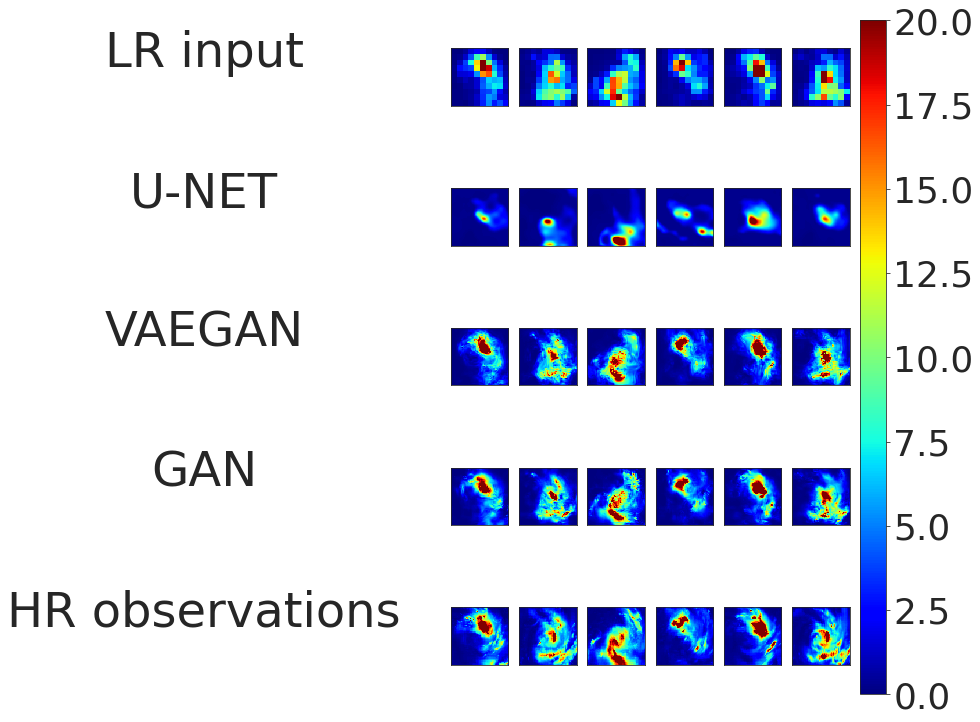

In [64]:
real = np.load('/user/home/al18709/work/gan_predictions_20/extreme_valid_real-opt_improve_7.npy')
inputs = np.load('/user/home/al18709/work/gan_predictions_20/extreme_valid_input-opt_improve_7.npy')
pred_cnn = np.load('/user/home/al18709/work/cnn/unet_valid.npy')
pred_dsrnngan = np.load('/user/home/al18709/work/gan_predictions_20/extreme_valid_pred-opt_improve_9.npy')[:,:,:,0]
pred_vaegan = np.load('/user/home/al18709/work/vaegan_predictions_20/extreme_valid_pred-opt_improve_5.npy')[:,:,:,0]
# pred_vaegan = np.load('/user/home/al18709/work/gan_predictions_20/extreme_valid_pred-opt_improve.npy')[:,:,:,0]
# pred_dsrnngan = np.load('/user/home/al18709/work/vaegan_predictions_20/extreme_valid_pred-opt_improve_6.npy')[:,:,:,0]

plot = 'save'
n = 5
m = 6
range_ = (0, 20)
storms = [1,2,3,4,5,6,7,8]

plot_predictions(inputs,pred_cnn,pred_vaegan,pred_dsrnngan,real,storms,range_)

In [13]:
print(real.shape)
print(pred_dsrnngan.shape)

(5425, 100, 100, 1)
(5425, 100, 100)


(16253, 100, 100)
(16252, 100, 100)
